In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import BayesianRidge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.iloc[:,0:8].describe().T


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

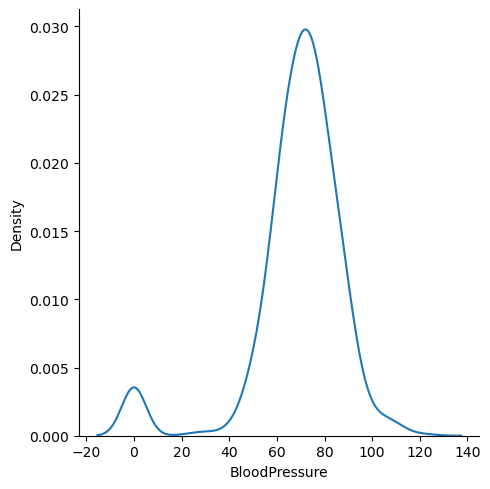

In [6]:
sns.displot(df['BloodPressure'], kind='kde')
plt.show()

`The blood pressure data displays two distinct peaks, one ranging from -20 to 20 and another from 40 to 120. However, there appears to be some data that was not properly recorded, which results in a small peak at 0. Both peaks exhibit a high degree of symmetry in their distribution.`

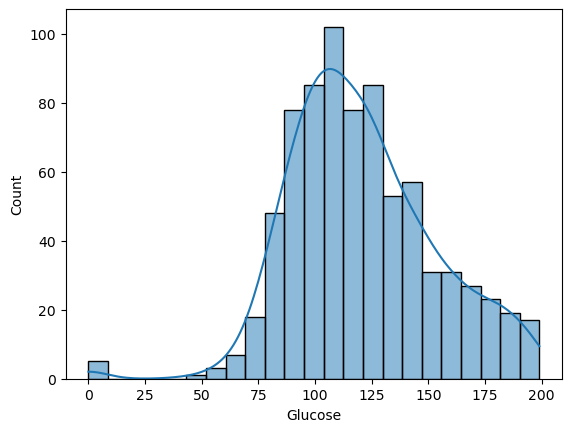

In [7]:
sns.histplot(df['Glucose'], kde=True)
plt.show()

`The plot shows that the distribution is slightly skewed to the right, indicating that there are more instances of high glucose levels.`

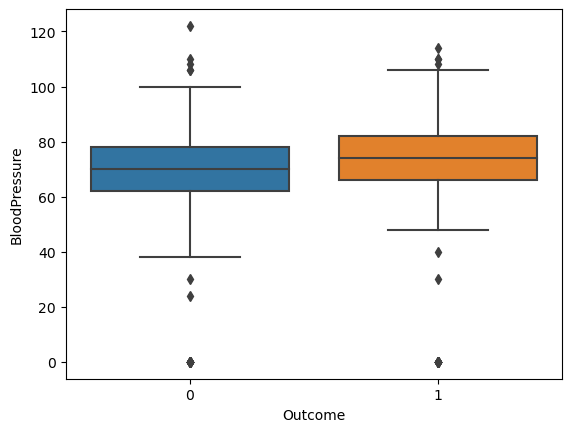

In [8]:
sns.boxplot(x='Outcome', y='BloodPressure', data=df)
plt.show()

`The plot shows that people with diabetes tend to have slightly higher blood pressure levels than those without diabetes.`

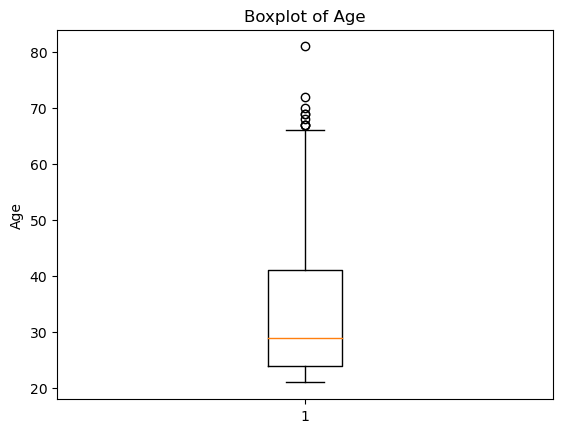

In [9]:
plt.boxplot(df['Age'])

plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

`There are multiple outlier above around age of 65`

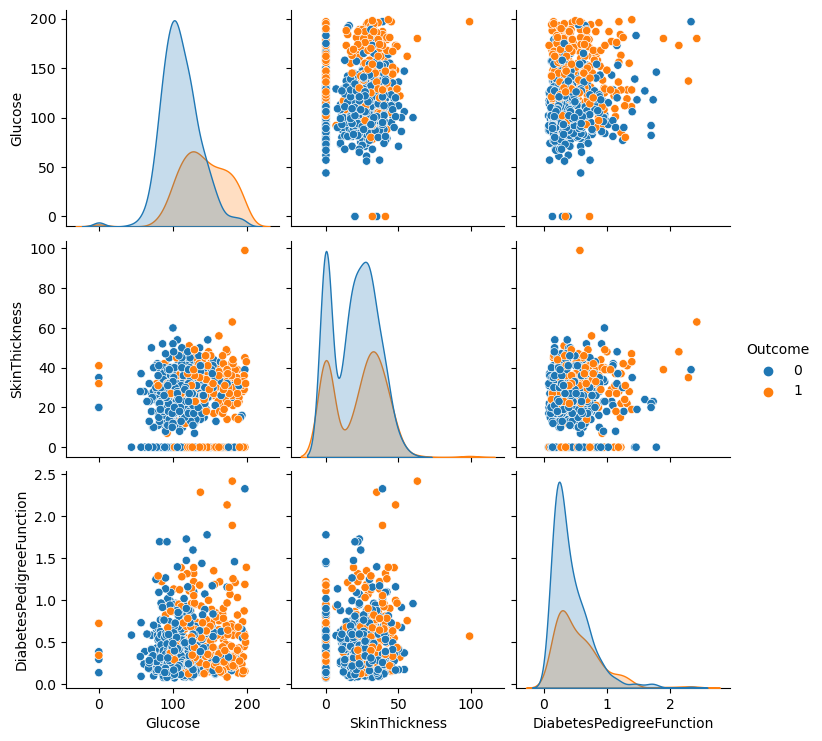

In [10]:
sns.pairplot(data=df,vars=['Glucose', 'SkinThickness', 'DiabetesPedigreeFunction'], hue='Outcome')
plt.show()

`Upon analysis, we observed that individuals with diabetes have considerably higher levels of glucose, skin thickness, and diabetes pedigree function. However, when comparing these three factors with one another, there appears to be little to no correlation between them. The graph does not show any positive or negative trends when comparing the variables.`

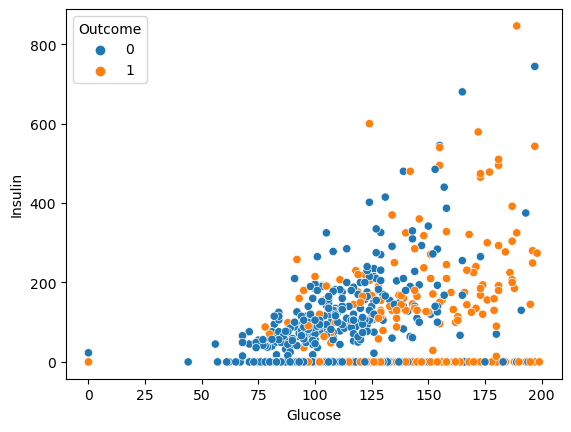

In [11]:
sns.scatterplot(x='Glucose',y='Insulin',data=df, hue="Outcome")
plt.show()

`It is evident from the data that there is a significant rise in insulin levels with an increase in glucose levels. Based on this, we can conclude that glucose and insulin are directly proportional to each other and that there are more instances of diabetes at higher glucose and insulin levels.`

In [12]:
df = df.replace({'SkinThickness': 0, 'BloodPressure': 0, 'BMI': 0, 'Glucose': 0, 'Insulin': 0}, np.nan)

In [13]:
df.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

# Plotting the data distribution before removing null values


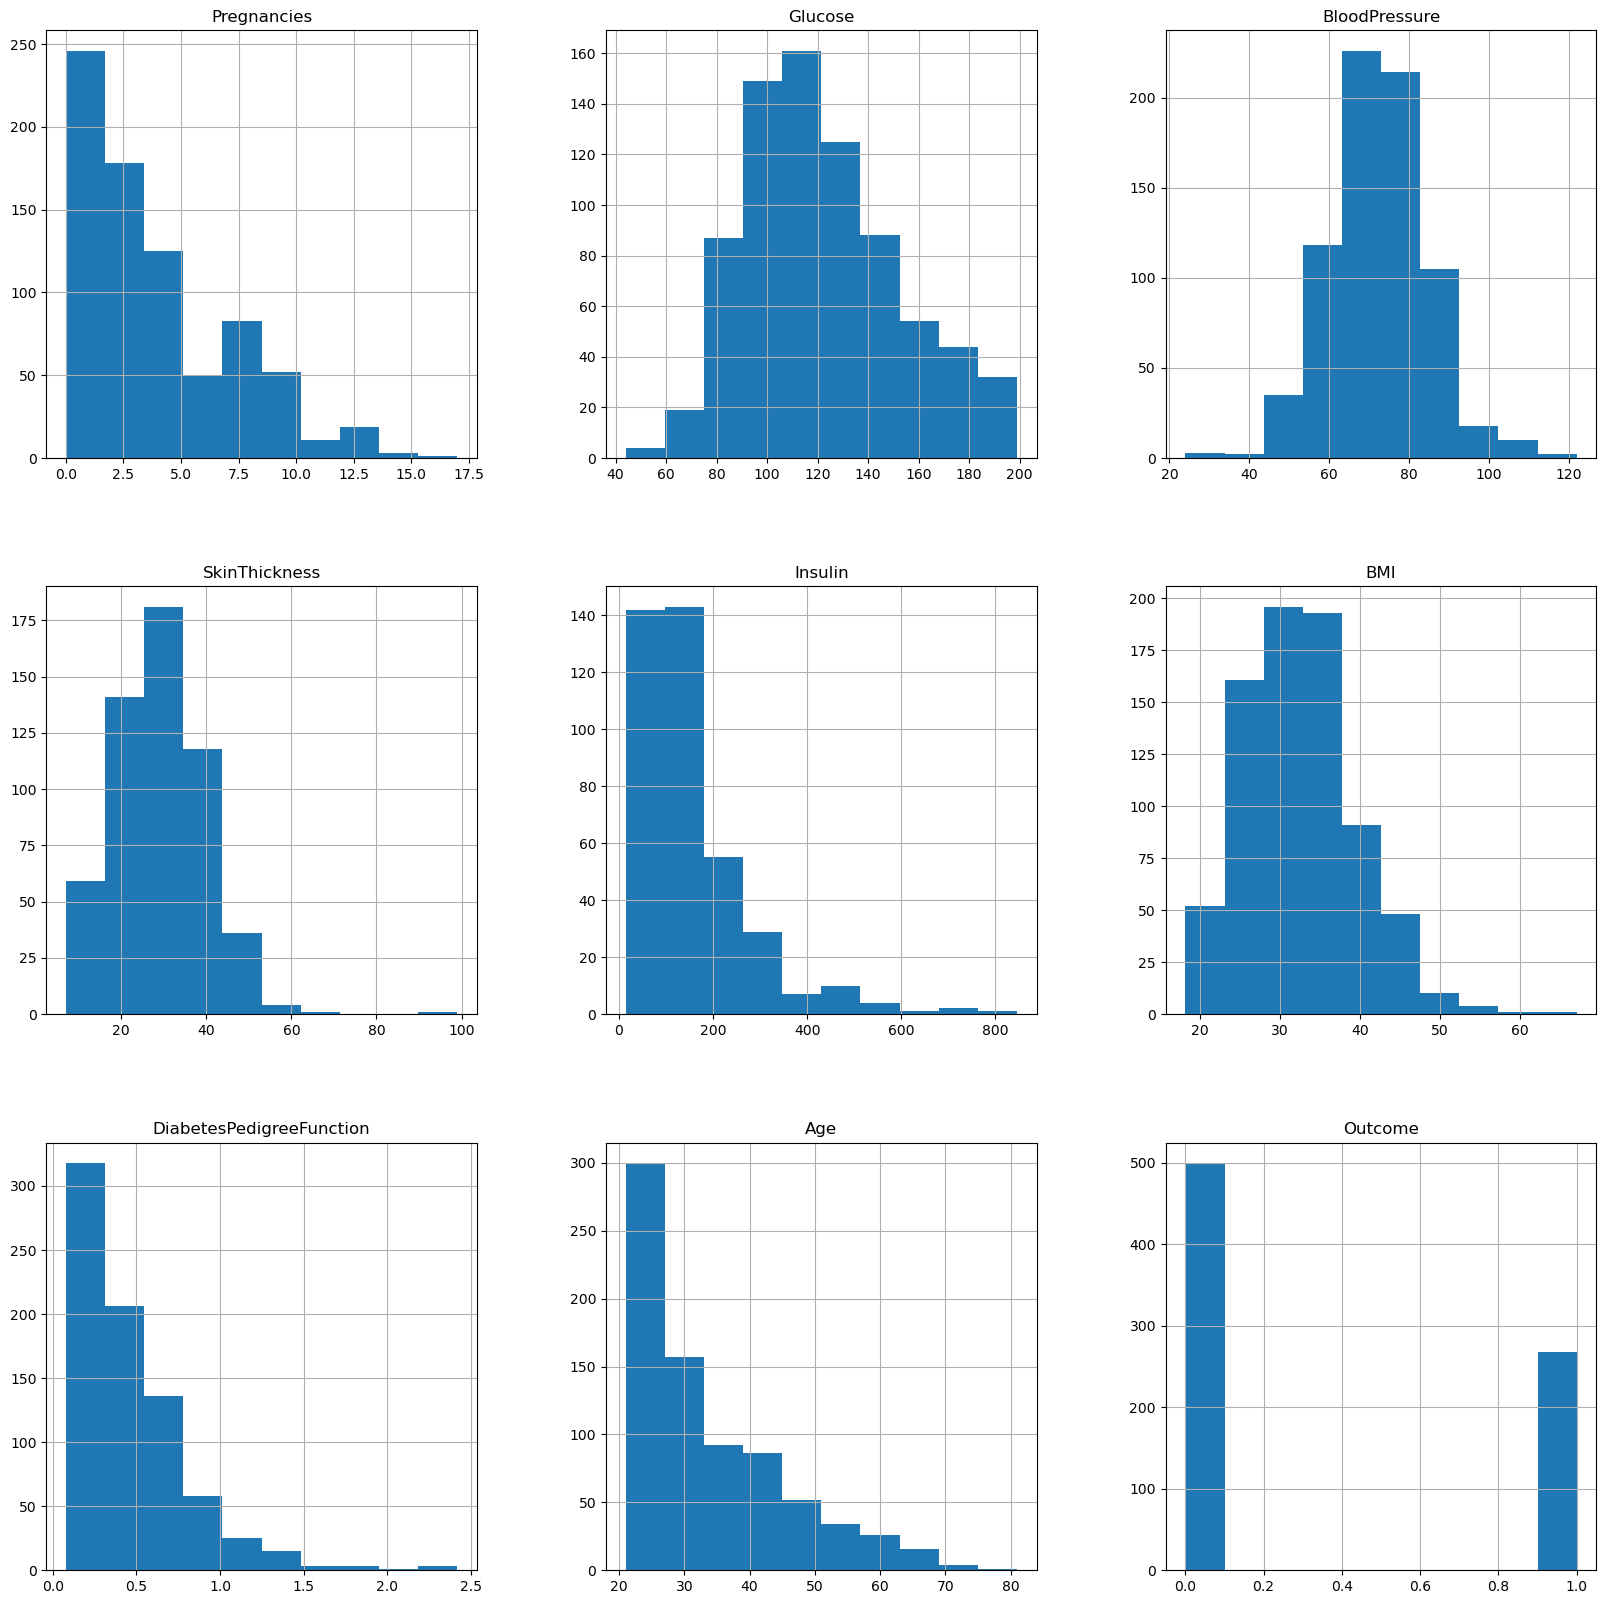

In [14]:
df.hist(figsize=(20, 20))
plt.show()

`Here, we have examined the distribution of each feature to determine whether it is a dependent or independent variable.`


## Next step involves replacing any missing values within a particular column by imputing the median value of that column

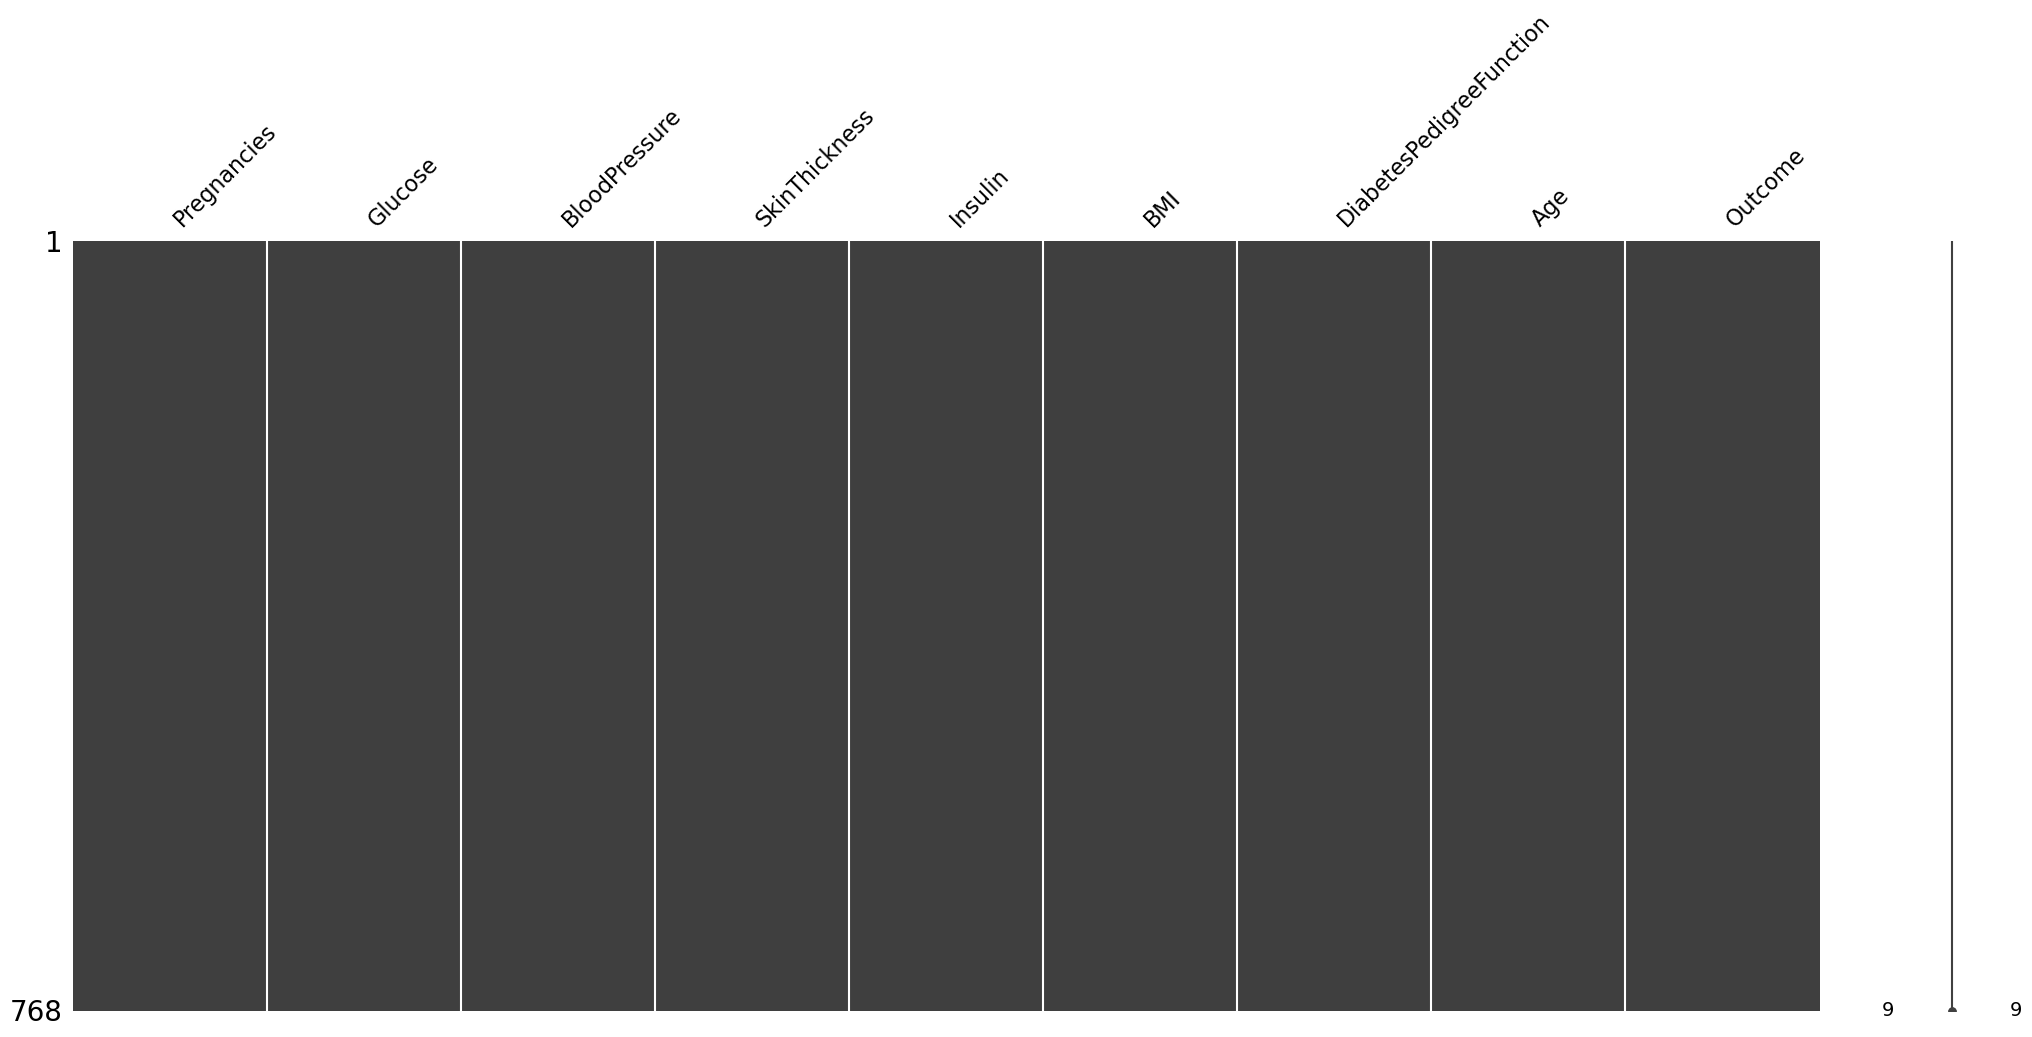

In [15]:
iimp = IterativeImputer(estimator=BayesianRidge(), max_iter=100, missing_values=np.nan, initial_strategy='median', imputation_order='ascending', random_state=14)
df = pd.DataFrame(iimp.fit_transform(df.copy()), columns=df.columns)
missingno.matrix(df)
plt.show()

`From the above graph we can clearly see that there are no null values in the dataset.`

# Correlation between all features

In [16]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130870,0.213642,0.107252,0.070629,0.024169,-0.033523,0.544341,0.221898
Glucose,0.130870,1.000000,0.230907,0.244078,0.699755,0.236735,0.138934,0.269674,0.496505
BloodPressure,0.213642,0.230907,1.000000,0.242911,0.139762,0.296616,0.003156,0.334850,0.174865
SkinThickness,0.107252,0.244078,0.242911,1.000000,0.251597,0.706193,0.122081,0.152020,0.279511
Insulin,0.070629,0.699755,0.139762,0.251597,1.000000,0.275206,0.135873,0.215504,0.361084
BMI,0.024169,0.236735,0.296616,0.706193,0.275206,1.000000,0.152242,0.028335,0.315251
DiabetesPedigreeFunction,-0.033523,0.138934,0.003156,0.122081,0.135873,0.152242,1.000000,0.033561,0.173844
Age,0.544341,0.269674,0.334850,0.152020,0.215504,0.028335,0.033561,1.000000,0.238356
Outcome,0.221898,0.496505,0.174865,0.279511,0.361084,0.315251,0.173844,0.238356,1.000000


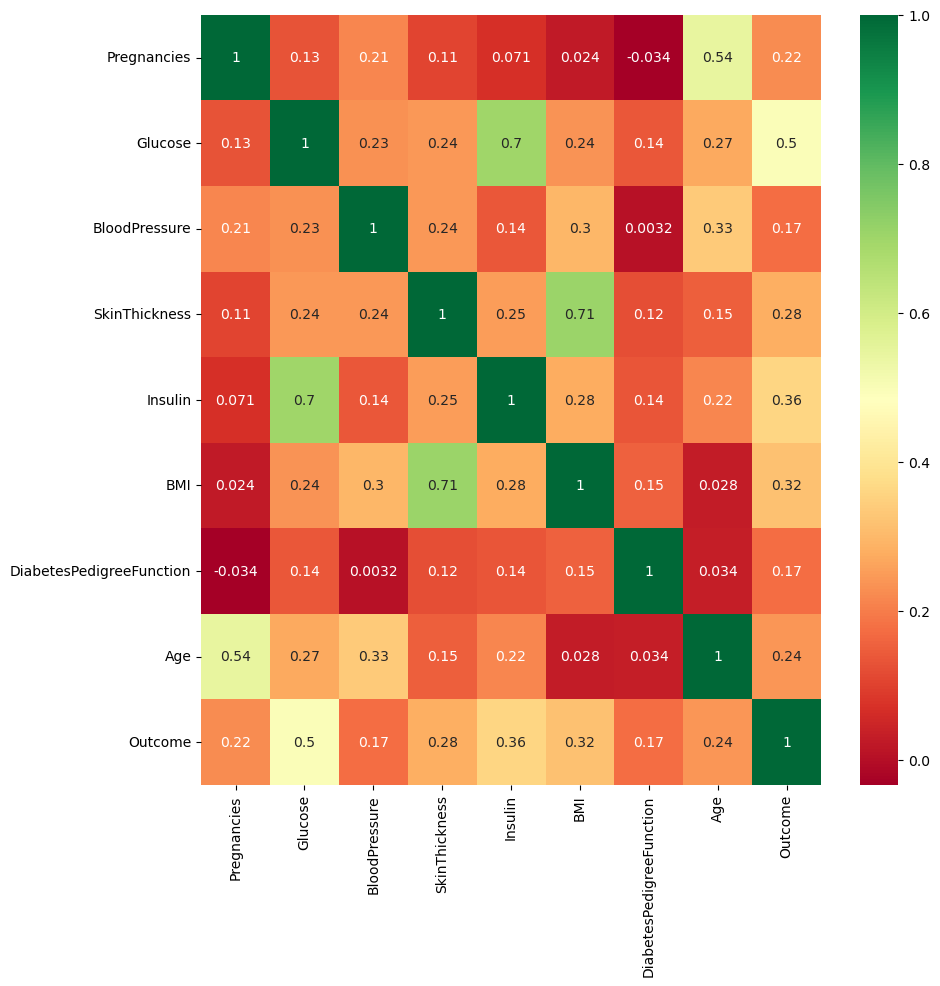

In [17]:
plt.figure(figsize=(10,10))
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')
plt.show()

`We have identified strong positive correlations between certain variables, including age and pregnancies, BMI and skin thickness, insulin and skin thickness, insulin and glucose, and BMI and blood pressure. However, there are no significant correlations between any other variables in the data.`

# Test Train Splitting

In [18]:
X = df.iloc[:,0:8]
y = df['Outcome']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

# Feature Scaling

In [20]:
%pip install imblearn
from imblearn.over_sampling import SMOTE

Note: you may need to restart the kernel to use updated packages.


In [21]:
smote = SMOTE(random_state=42)


In [22]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [23]:
scaler = StandardScaler()
scaler.fit(X_train_resampled)
X_train_resampled_stan = scaler.transform(X_train_resampled)
X_test_stan = scaler.transform(X_test)

# Logistic Regression

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

parameters = {
    "max_iter": range(75, 85),
    "solver": ["newton-cg","lbfgs","liblinear", "sag", "saga"],
    "penalty": ["l1", "l2", "elasticnet", "none"]
}

model = LogisticRegression()

search_model= GridSearchCV(model, parameters)

search_model.fit(X_train_resampled_stan, y_train_resampled)

print("Best parameters:", search_model.best_params_)

Best parameters: {'max_iter': 75, 'penalty': 'l1', 'solver': 'saga'}


In [25]:
lr = LogisticRegression(max_iter=75,penalty='l1',solver='saga')
print("5 fold cross validation measuring F1 score:", cross_val_score(lr, X_train_resampled_stan, y_train_resampled, cv=5, scoring="f1_micro"))

5 fold cross validation measuring F1 score: [0.8013245  0.74172185 0.69536424 0.72847682 0.75333333]


In [26]:
lr.fit(X_train_resampled_stan, y_train_resampled)
y_pred = lr.predict(X_test_stan)
y_pred

array([0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 0.])

In [27]:
metrics.accuracy_score(y_test, y_pred)

0.6875

In [28]:
metrics.f1_score(y_test, y_pred, average="micro")

0.6875

In [29]:
mse = metrics.mean_squared_error(y_test, y_pred)
mse

0.3125

In [30]:
confusion_matrix(y_test, y_pred)

array([[85, 38],
       [22, 47]])

In [31]:
pd.DataFrame(lr.coef_, columns=df.columns[:8])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.211422,1.328871,-0.202424,0.115122,-0.120236,0.663919,0.13245,0.469518


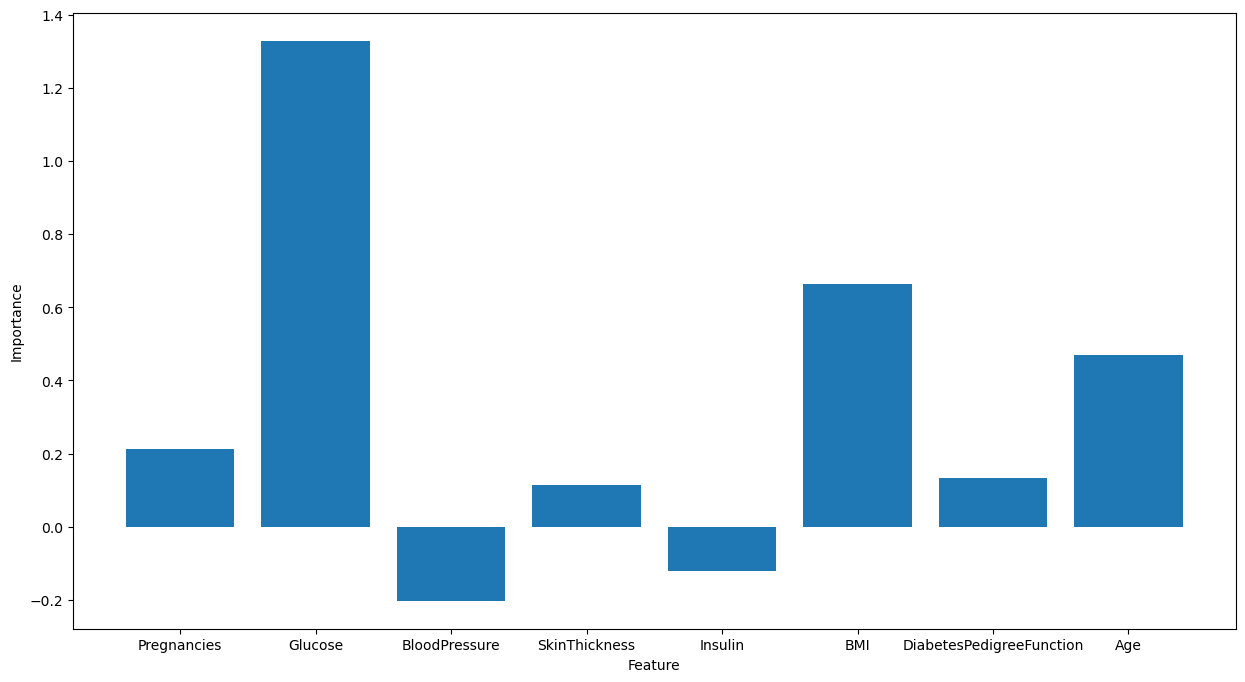

In [32]:
column = df.columns[0:8]
coef = lr.coef_[0]
plt.figure(figsize=(15,8))
plt.bar(column, coef)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

In [33]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(85, 38, 22, 47)

In [34]:
accuracy = tp + tn / sum([tn, fp, fn, tp])
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * recall) / (precision + recall))
pd.DataFrame({
    'metric': ['accuracy', 'precision', 'recall', 'specificity', 'f1_score'],
    'value': [accuracy, precision, recall, specificity, f1_score]
})

,metric,value
0,accuracy,47.442708
1,precision,0.552941
2,recall,0.681159
3,specificity,0.691057
4,f1_score,0.610390


# Support Vector Machine

In [35]:
svc = SVC()
svc.fit(X_train_resampled_stan, y_train_resampled)

SVC()

In [36]:
y_pred = svc.predict(X_test_stan)
y_pred

array([1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0.])

In [37]:
metrics.accuracy_score(y_test, y_pred)

0.7135416666666666

In [38]:
metrics.f1_score(y_test, y_pred)

0.6357615894039734

In [39]:
confusion_matrix(y_test, y_pred)

array([[89, 34],
       [21, 48]])

In [40]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(89, 34, 21, 48)

In [41]:
accuracy = tp + tn / sum([tn, fp, fn, tp])
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * recall) / (precision + recall))
pd.DataFrame({
    'metric': ['accuracy', 'precision', 'recall', 'specificity', 'f1_score'],
    'value': [accuracy, precision, recall, specificity, f1_score]
})

,metric,value
0,accuracy,48.463542
1,precision,0.585366
2,recall,0.695652
3,specificity,0.723577
4,f1_score,0.635762


In [42]:
mse = metrics.mean_squared_error(y_test, y_pred)
mse

0.2864583333333333

# Decision Tree

In [43]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train_resampled_stan,y_train_resampled)

DecisionTreeClassifier()

In [44]:
y_pred = dtree.predict(X_test_stan)
y_pred

array([0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0.])

In [45]:
metrics.accuracy_score(y_test, y_pred)

0.6927083333333334

In [46]:
mse = metrics.mean_squared_error(y_test, y_pred)
mse

0.3072916666666667

In [47]:
metrics.f1_score(y_test, y_pred, average="micro")

0.6927083333333334

In [48]:
confusion_matrix(y_test, y_pred)

array([[88, 35],
       [24, 45]])

In [49]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(88, 35, 24, 45)

In [50]:
accuracy = tp + tn / sum([tn, fp, fn, tp])
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * recall) / (precision + recall))
pd.DataFrame({
    'metric': ['accuracy', 'precision', 'recall', 'specificity', 'f1_score'],
    'value': [accuracy, precision, recall, specificity, f1_score]
})

,metric,value
0,accuracy,45.458333
1,precision,0.562500
2,recall,0.652174
3,specificity,0.715447
4,f1_score,0.604027


In [51]:
dtree.feature_importances_

array([0.03397231, 0.30617484, 0.07376686, 0.05632504, 0.15335111,
       0.11280826, 0.0829523 , 0.18064929])

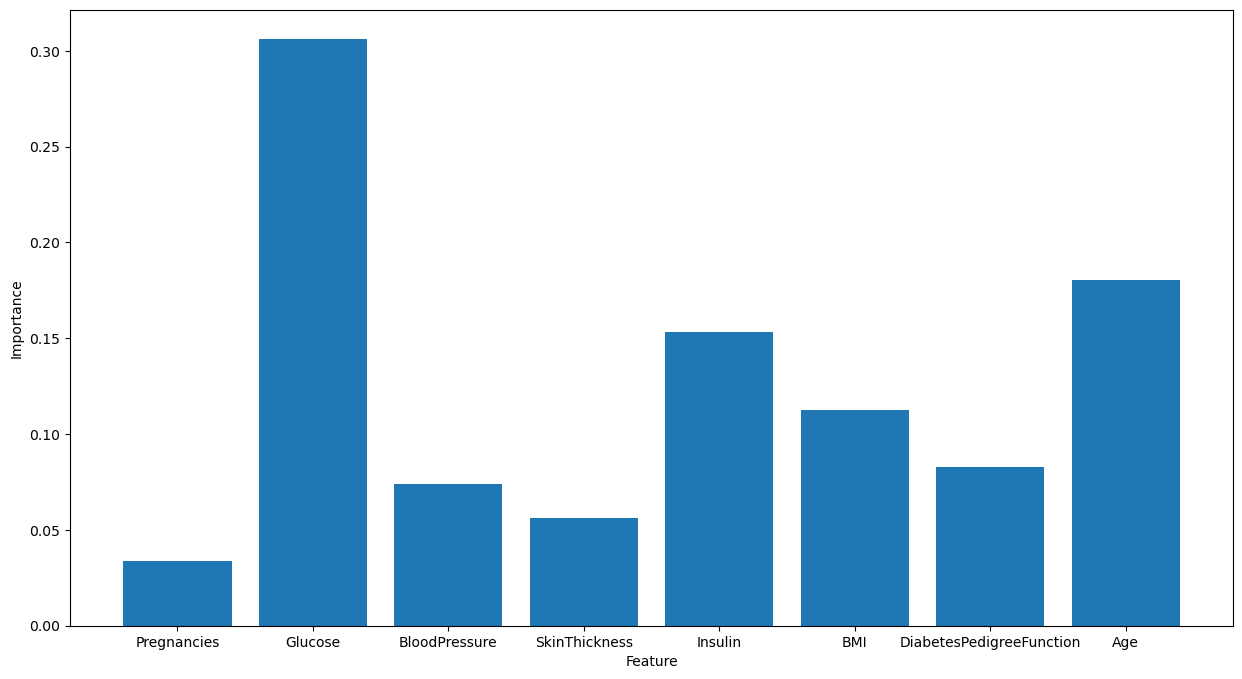

In [52]:
column = df.columns[0:8]
coef = dtree.feature_importances_
plt.figure(figsize=(15,8))
plt.bar(column, coef)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

# Random Forest

In [53]:
rand_forest = RandomForestClassifier(n_estimators=200)
rand_forest.fit(X_train_resampled_stan,y_train_resampled)

RandomForestClassifier(n_estimators=200)

In [54]:
y_pred = rand_forest.predict(X_test_stan)
y_pred

array([1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0.])

In [55]:
metrics.accuracy_score(y_test, y_pred)


0.7239583333333334

In [56]:
mse = metrics.mean_squared_error(y_test, y_pred)
mse

0.2760416666666667

In [57]:
metrics.f1_score(y_test, y_pred, average="micro")

0.7239583333333333

In [58]:
confusion_matrix(y_test, y_pred)

array([[88, 35],
       [18, 51]])

In [59]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(88, 35, 18, 51)

In [60]:
accuracy = tp + tn / sum([tn, fp, fn, tp])
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * recall) / (precision + recall))
pd.DataFrame({
    'metric': ['accuracy', 'precision', 'recall', 'specificity', 'f1_score'],
    'value': [accuracy, precision, recall, specificity, f1_score]
})

,metric,value
0,accuracy,51.458333
1,precision,0.593023
2,recall,0.739130
3,specificity,0.715447
4,f1_score,0.658065


In [61]:
imp_feature = rand_forest.feature_importances_
imp_feature

array([0.06771045, 0.20823571, 0.07229702, 0.10021973, 0.18372545,
       0.12713536, 0.0978856 , 0.14279068])

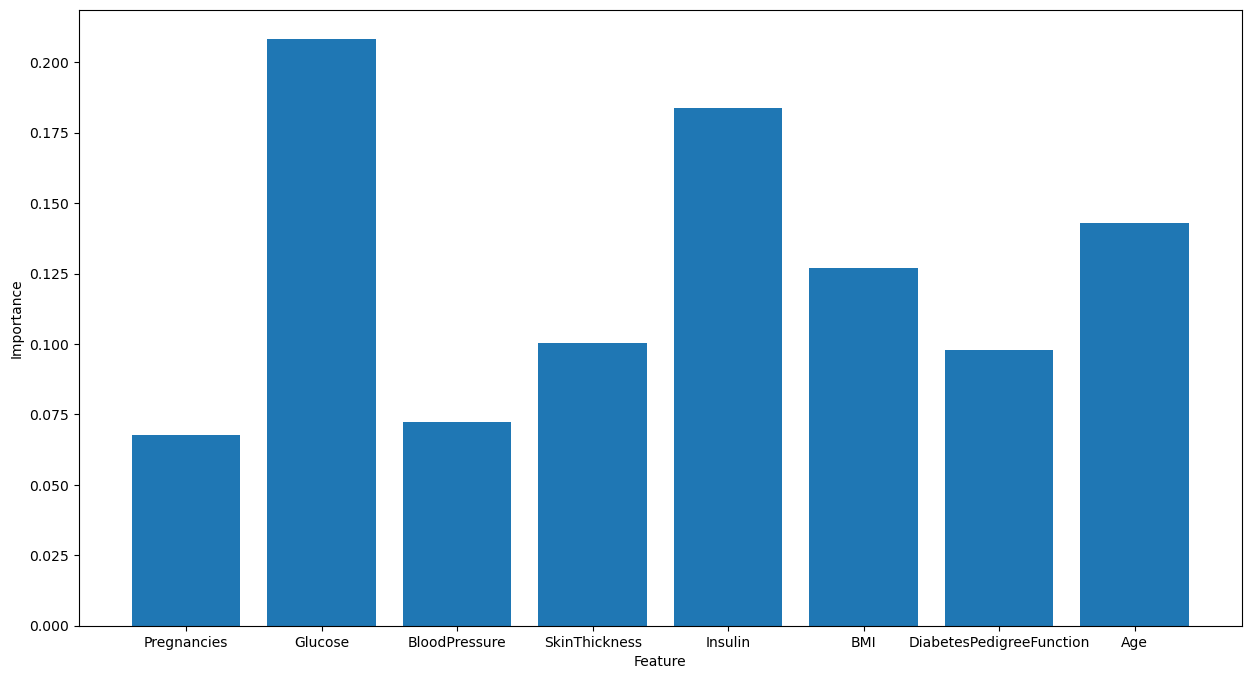

In [62]:
col = df.columns[0:8]
plt.figure(figsize=(15,8))
plt.bar(col, imp_feature)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

# The Conclusion from Model Building

`Out of all the model we built, Random Forest is the best model for this prediction since it has an accuracy_score and f1_score of 0.7239583333333334, mean squared error of 0.2760416666666667.`